In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

file_path = '/content/world_health_data.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

,country,country_code,year,health_exp,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality,prev_hiv,inci_tuberc,prev_undernourishment
0,Aruba,ABW,1999,NaN,73.561000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1999,NaN,51.258874,NaN,88.285642,38.433841,142.506373,6.684793,NaN,NaN
2,Afghanistan,AFG,1999,NaN,54.846000,NaN,94.600000,64.000000,135.800000,0.100000,NaN,NaN
3,Africa Western and Central,AFW,1999,NaN,49.726429,NaN,101.541373,44.733554,173.943151,NaN,NaN,NaN
4,Angola,AGO,1999,NaN,45.386000,NaN,123.500000,51.000000,208.000000,1.300000,NaN,NaN


In [5]:
df.describe()

,year,health_exp,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality,prev_hiv,inci_tuberc,prev_undernourishment
count,6650.000000,5167.000000,6190.000000,4893.000000,5856.000000,5856.000000,5856.000000,4270.000000,5429.000000,4805.000000
mean,2011.000000,6.200581,70.066531,200.862661,28.966389,16.410860,40.399681,1.806485,126.391393,11.102418
std,7.211645,2.790519,8.667172,266.880355,25.493757,12.624923,40.898593,4.007134,179.738222,10.534553
min,1999.000000,1.107200,41.957000,1.000000,1.300000,0.700000,1.500000,0.100000,0.000000,2.500000
25%,2005.000000,4.246770,64.439894,18.000000,8.400000,5.200000,9.900000,0.100000,14.000000,2.631544
50%,2011.000000,5.443990,71.839268,74.000000,20.100000,12.700000,23.606879,0.400000,51.000000,7.100000
75%,2017.000000,7.790887,76.612000,297.000000,44.400000,25.700000,60.100000,1.500000,177.000000,15.965738
max,2023.000000,24.283052,85.532683,1687.000000,140.800000,64.000000,237.500000,29.900000,1590.000000,71.400000


In [ ]:
df.info()

In [6]:
df.isnull().sum()

,0
country,0
country_code,0
year,0
health_exp,1483
life_expect,460
maternal_mortality,1757
infant_mortality,794
neonatal_mortality,794
under_5_mortality,794
prev_hiv,2380


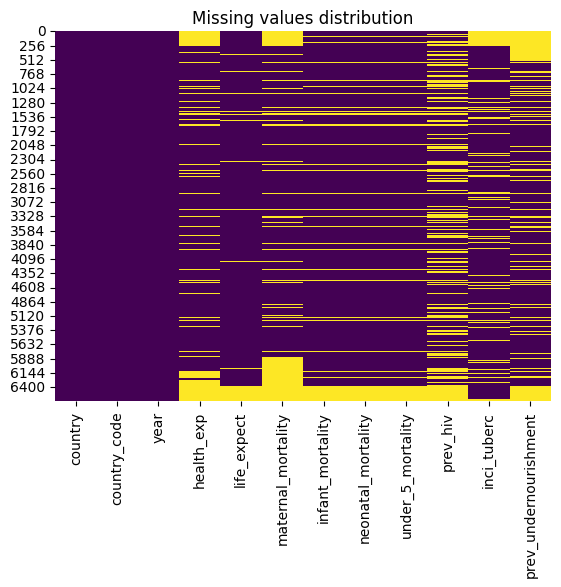

In [7]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing values distribution")
plt.show()

In [8]:
duplicates = df.duplicated()

print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


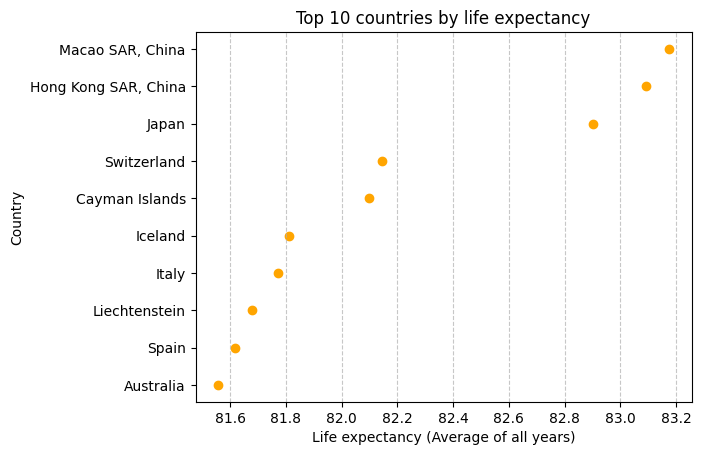

In [10]:
df_countries_life_expect = df.groupby('country')['life_expect'].mean().reset_index()
df_top10_life_expect = df_countries_life_expect.nlargest(10, 'life_expect')

plt.scatter(df_top10_life_expect['life_expect'], df_top10_life_expect['country'], color='orange')
plt.xlabel('Life expectancy (Average of all years)')
plt.ylabel('Country')
plt.title('Top 10 countries by life expectancy')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()

plt.show()

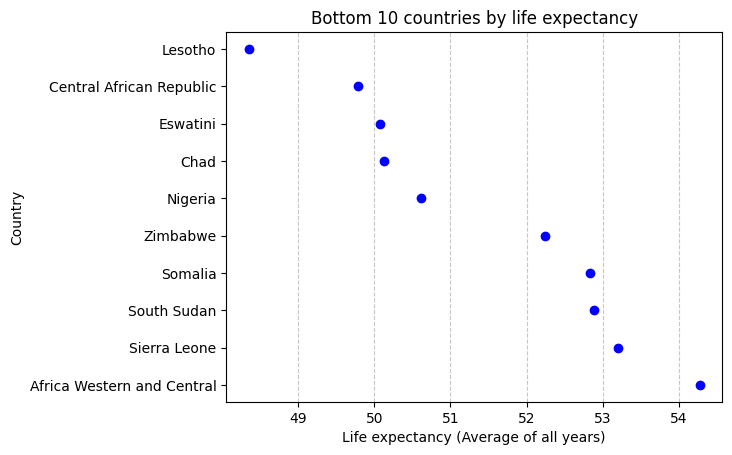

In [11]:
df_countries_life_expect = df.groupby('country')['life_expect'].mean().reset_index()
df_bottom10_life_expect = df_countries_life_expect.nsmallest(10, 'life_expect')

plt.scatter(df_bottom10_life_expect['life_expect'], df_bottom10_life_expect['country'], color='blue')
plt.xlabel('Life expectancy (Average of all years)')
plt.ylabel('Country')
plt.title('Bottom 10 countries by life expectancy')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()

plt.show()

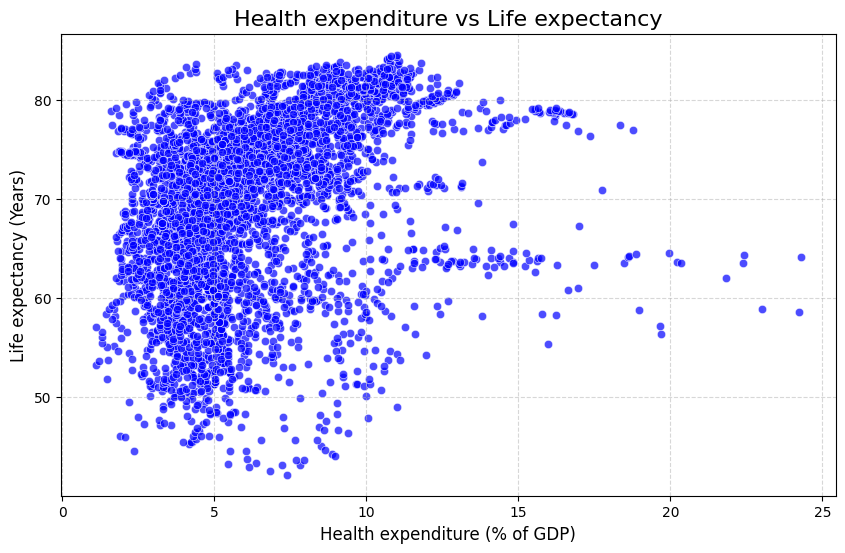

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='health_exp', y='life_expect', alpha=0.7, color='blue')

plt.title('Health expenditure vs Life expectancy', fontsize=16)
plt.xlabel('Health expenditure (% of GDP)', fontsize=12)
plt.ylabel('Life expectancy (Years)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

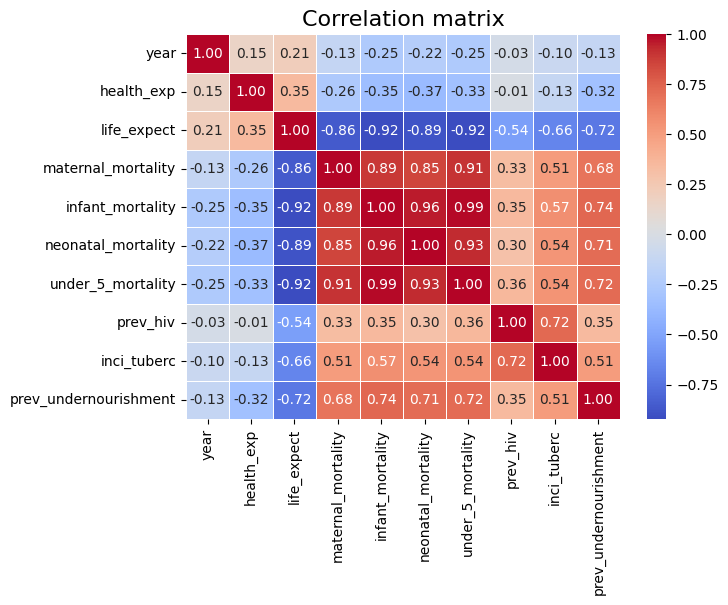

In [13]:
df_numeric = df.select_dtypes(include=['number'])

df_all_corr = df_numeric.corr()

plt.figure(figsize=(7, 5))
sns.heatmap(df_all_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation matrix', fontsize=16)

plt.show()

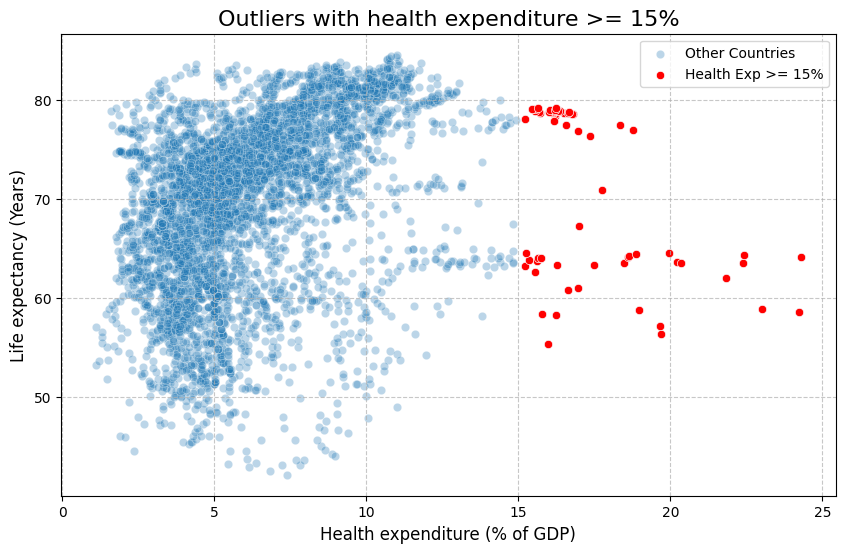

In [14]:
df_high_health_exp = df[df['health_exp'] >= 15]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='health_exp', y='life_expect', alpha=0.3, label='Other Countries')

sns.scatterplot(data=df_high_health_exp, x='health_exp', y='life_expect', color='red', label='Health Exp >= 15%')

plt.title('Outliers with health expenditure >= 15%', fontsize=16)
plt.xlabel('Health expenditure (% of GDP)', fontsize=12)
plt.ylabel('Life expectancy (Years)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

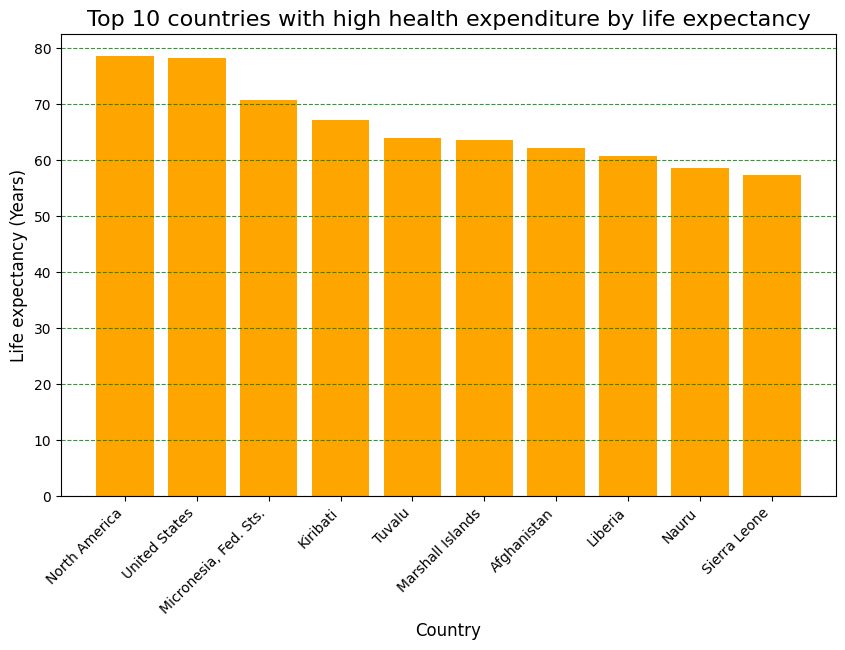

In [16]:
df_high_health_exp = df[df['health_exp'] >= 15]

df_outlier_countries = df_high_health_exp.groupby('country')['life_expect'].mean().reset_index()
df_top10_high_health_exp = df_outlier_countries.nlargest(10, 'life_expect')

plt.figure(figsize=(10, 6))
# The variable name was corrected here: df_top_high_health_exp to df_top10_high_health_exp
plt.bar(df_top10_high_health_exp['country'], df_top10_high_health_exp['life_expect'], color='orange')

plt.title('Top 10 countries with high health expenditure by life expectancy', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Life expectancy (Years)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.8, color='green')

plt.show()

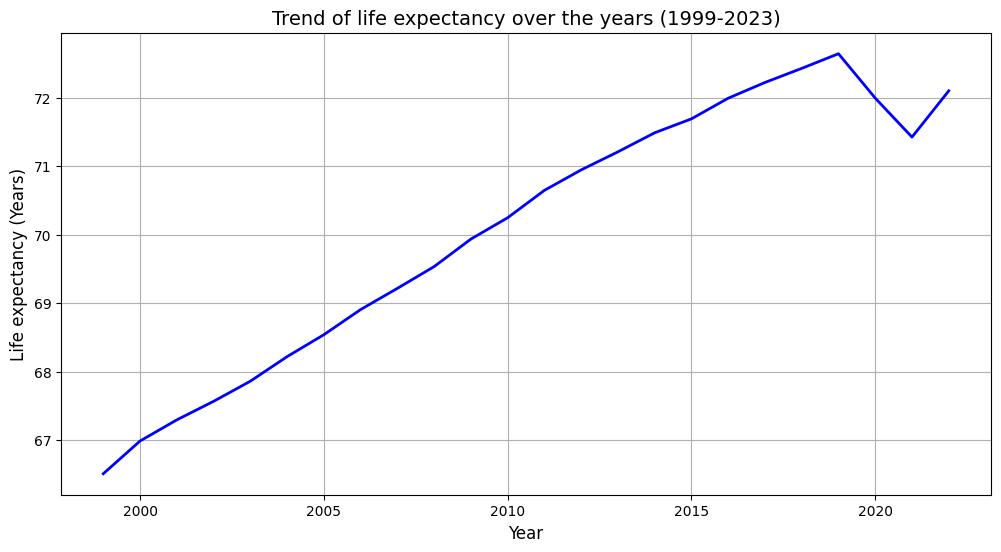

In [19]:
df_life_exp_over_year = df.groupby('year')['life_expect'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_life_exp_over_year, x='year', y='life_expect', color='blue', linewidth=2)
plt.title("Trend of life expectancy over the years (1999-2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Life expectancy (Years)", fontsize=12)
plt.grid(True)


plt.show()

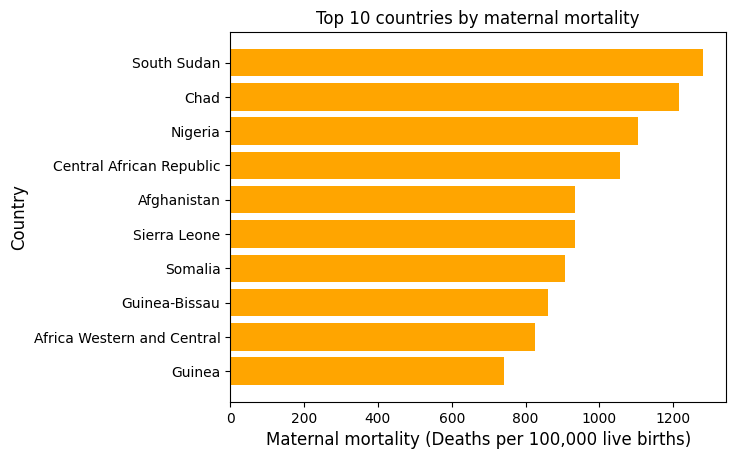

In [26]:
df_maternal_mortality = df.groupby('country')['maternal_mortality'].mean().reset_index()
df_top10_maternal_mortality = df_maternal_mortality.nlargest(10, 'maternal_mortality')

plt.barh(df_top10_maternal_mortality['country'], df_top10_maternal_mortality['maternal_mortality'], color='orange')
plt.xlabel('Maternal mortality (Deaths per 100,000 live births)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Top 10 countries by maternal mortality', fontsize=12)
plt.gca().invert_yaxis()

plt.show()

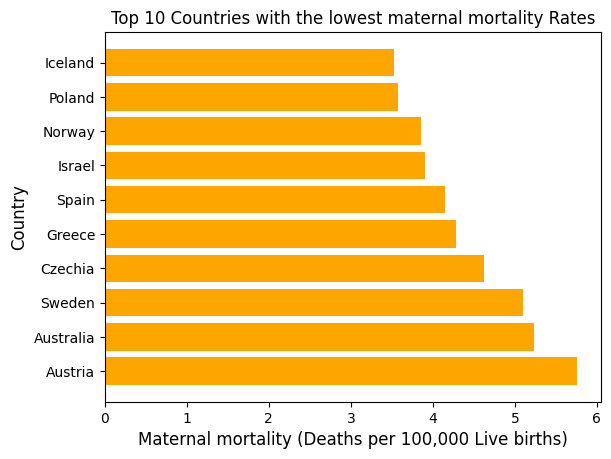

In [25]:
df_maternal_mortality = df.groupby('country')['maternal_mortality'].mean().reset_index()
df_bottom10_maternal_mortality = df_maternal_mortality.nsmallest(10, 'maternal_mortality')

plt.barh(df_bottom10_maternal_mortality['country'], df_bottom10_maternal_mortality['maternal_mortality'], color='orange')
plt.xlabel('Maternal mortality (Deaths per 100,000 Live births)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Top 10 Countries with the lowest maternal mortality Rates', fontsize=12)
plt.gca().invert_yaxis()

plt.show()

In [ ]:
df_infant_mortality = df.groupby('country')['infant_mortality'].mean().reset_index()
df_top10_infant_mortality = df_infant_mortality.nlargest(10, 'infant_mortality')

plt.barh(df_top10_infant_mortality['country'], df_top10_infant_mortality['infant_mortality'], color='green')
plt.xlabel('Infant mortality (Deaths per 1,000 live births)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Top 10 countries by infant mortality', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

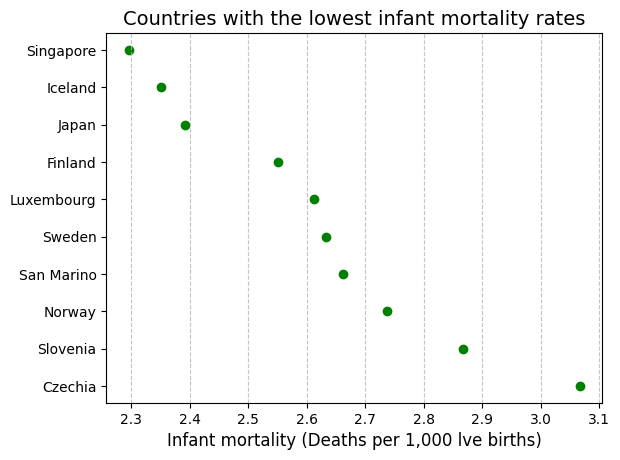

In [27]:
df_infant_mortality = df.groupby('country')['infant_mortality'].mean().reset_index()
df_bottom10_infant_mortality = df_infant_mortality.nsmallest(10, 'infant_mortality')

plt.scatter(df_bottom10_infant_mortality['infant_mortality'], df_bottom10_infant_mortality['country'], color='green')
plt.xlabel("Infant mortality (Deaths per 1,000 lve births)", fontsize=12)
plt.title('Countries with the lowest infant mortality rates', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.75)
plt.gca().invert_yaxis()

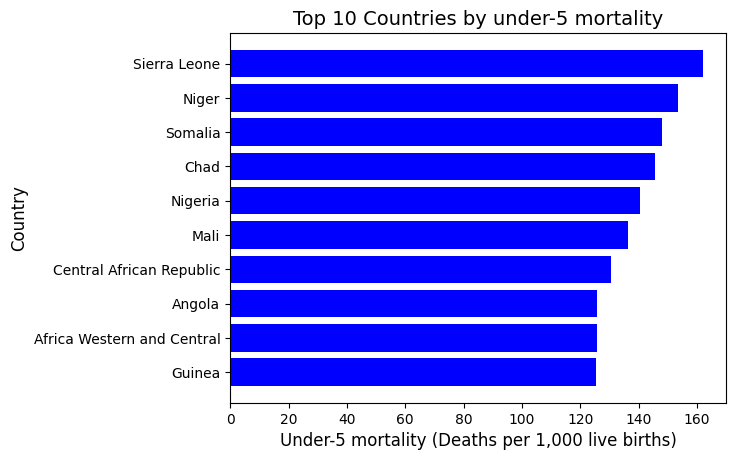

In [31]:
df_under5_mortality = df.groupby('country')['under_5_mortality'].mean().reset_index()
df_top10_under5_mortality = df_under5_mortality.nlargest(10, 'under_5_mortality')

plt.barh(df_top10_under5_mortality['country'], df_top10_under5_mortality['under_5_mortality'], color='blue')
plt.xlabel('Under-5 mortality (Deaths per 1,000 live births)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Top 10 Countries by under-5 mortality', fontsize=14)
plt.gca().invert_yaxis()

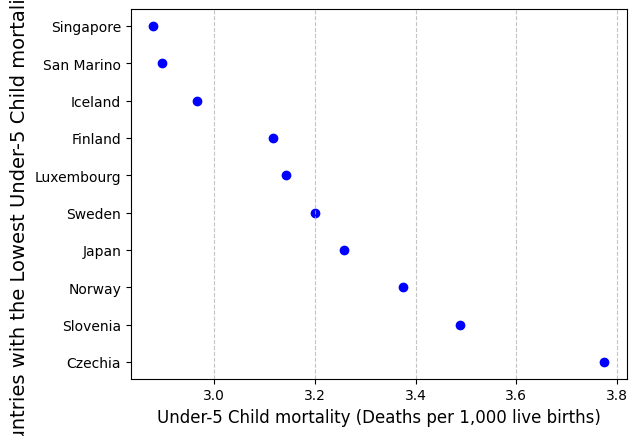

In [33]:
df_under5_mortality = df.groupby('country')['under_5_mortality'].mean().reset_index()
df_bottom10_under5_mortality = df_under5_mortality.nsmallest(10, 'under_5_mortality')

plt.scatter(df_bottom10_under5_mortality['under_5_mortality'], df_bottom10_under5_mortality['country'], color='blue')
plt.xlabel('Under-5 Child mortality (Deaths per 1,000 live births)', fontsize=12)
plt.ylabel('Countries with the Lowest Under-5 Child mortality rates', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.75)
plt.gca().invert_yaxis()

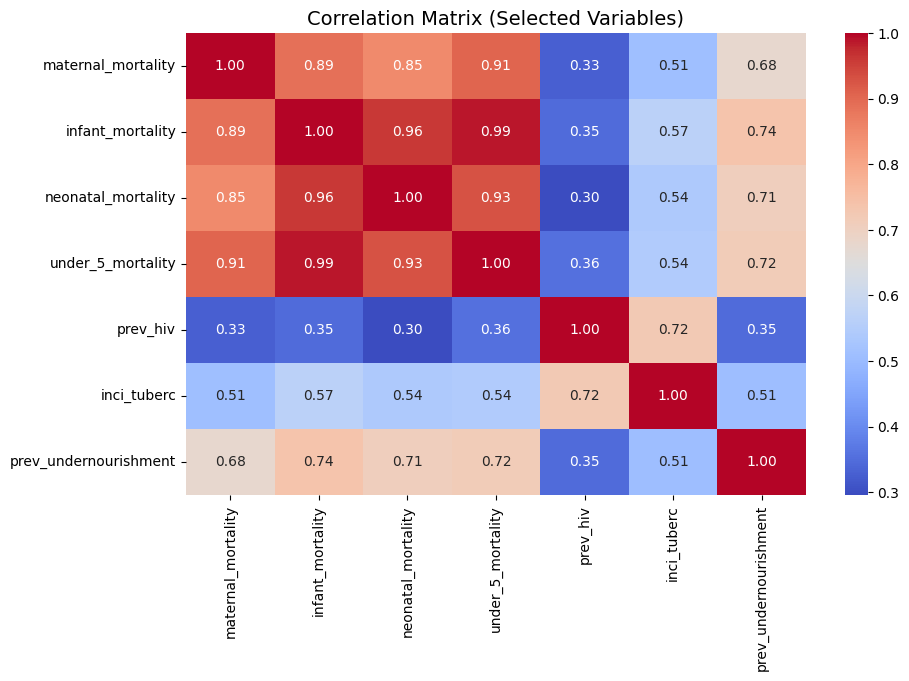

In [36]:
selected_columns = ['maternal_mortality', 'infant_mortality', 'neonatal_mortality',
'under_5_mortality', 'prev_hiv', 'inci_tuberc', 'prev_undernourishment']

corr_matrix = df[selected_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Selected Variables)', fontsize=14)
plt.show()

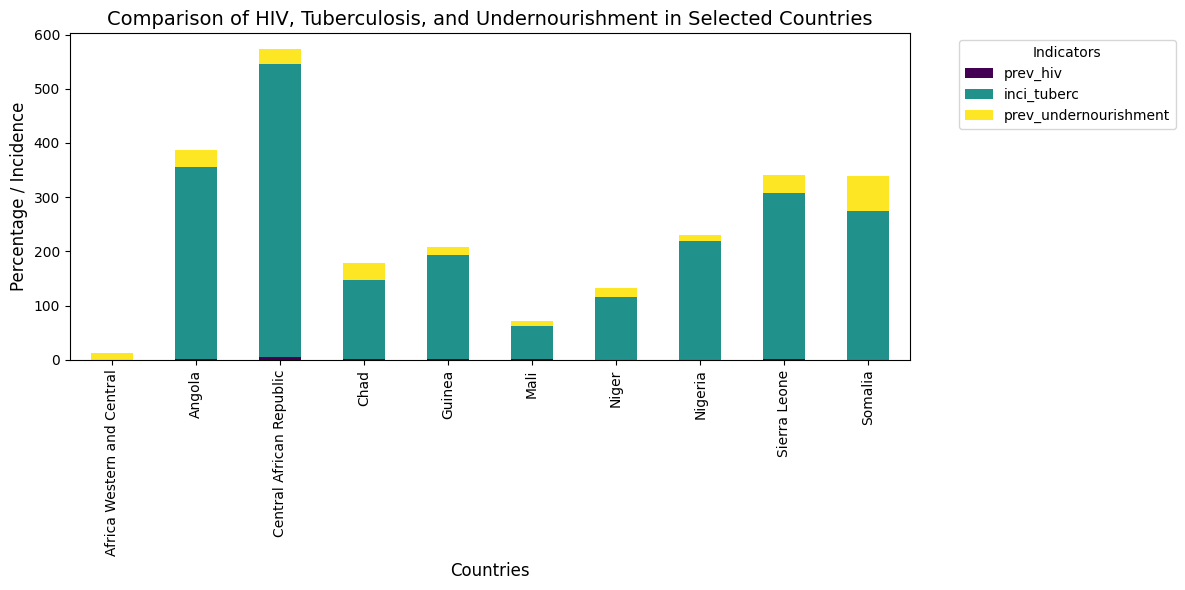

In [41]:
selected_countries = ['Sierra Leone', 'Niger', 'Somalia', 'Chad', 'Nigeria',
                     'Mali', 'Central African Republic', 'Angola', 'Africa Western and Central', 'Guinea']

df_selected = df[df['country'].isin(selected_countries)]

stacked_data = df_selected.groupby('country')[['prev_hiv', 'inci_tuberc', 'prev_undernourishment']].mean()

stacked_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Comparison of HIV, Tuberculosis, and Undernourishment in Selected Countries', fontsize=14)
plt.ylabel('Percentage / Incidence', fontsize=12)
plt.xlabel('Countries', fontsize=12)
plt.legend(title='Indicators', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [43]:
label_encoder_country = LabelEncoder()

# Encode the 'country' column
df['country_encoded'] = label_encoder_country.fit_transform(df['country'])

# Fill missing values for selected columns using interpolation and backfill/forward fill within each country group
columns_to_fill = ['life_expect', 'health_exp', 'infant_mortality', 'neonatal_mortality',
                   'under_5_mortality', 'maternal_mortality', 'prev_undernourishment',
                   'prev_hiv', 'inci_tuberc']
for col in columns_to_fill:
    df[col] = df.groupby('country')[col].transform(
        lambda x: x.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
    )

# Handle remaining NaN values globally using the median for the entire dataset
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].median())

<ipython-input-43-c689a5b98400>:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
<ipython-input-43-c689a5b98400>:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
<ipython-input-43-c689a5b98400>:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
<ipython-input-43-c689a5b98400>:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.interpolate(method='linear').fillna(method=

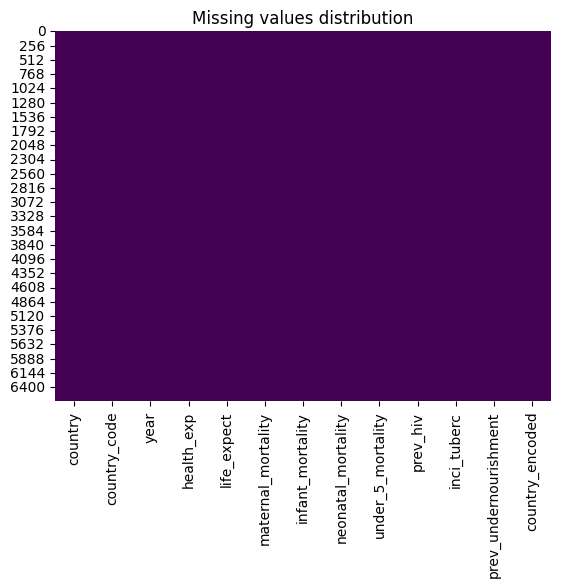

In [44]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing values distribution")
plt.show()

In [45]:
X = df.drop(columns=['country', 'country_code', 'life_expect'])
y = df['life_expect']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 42)

rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, max_features='sqrt',
min_samples_leaf=1,
min_samples_split=2,
random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared (MSE): {mse:.2f}')
print(f'R-squared (R²) {r2:.4f}')


Mean Squared (MSE): 1.20
R-squared (R²) 0.9834


In [46]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

print("Average R² (Cross-validation):", cv_scores.mean())

Average R² (Cross-validation): 0.9656866970535652


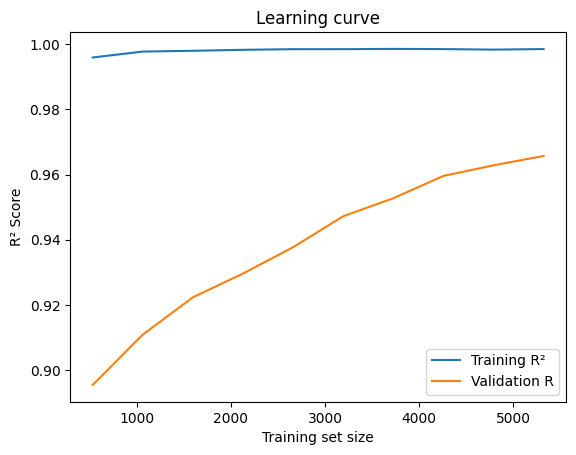

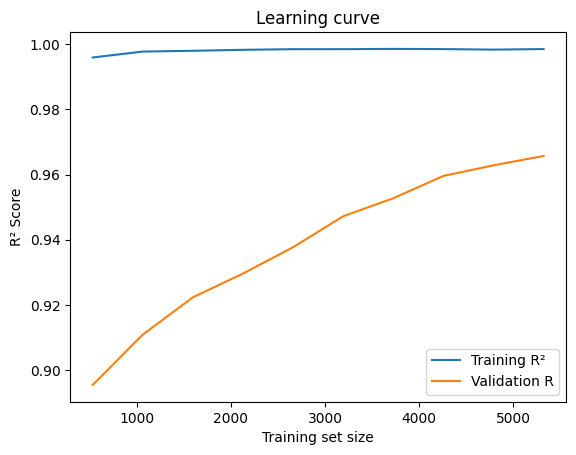

In [48]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    rf_model, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training R²")
plt.plot(train_sizes, val_mean, label="Validation R")
plt.xlabel("Training set size")
plt.ylabel("R² Score")
plt.legend()
plt.title("Learning curve")
plt.show()
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training R²")
plt.plot(train_sizes, val_mean, label="Validation R")
plt.xlabel("Training set size")
plt.ylabel("R² Score")
plt.legend()
plt.title("Learning curve")
plt.show()

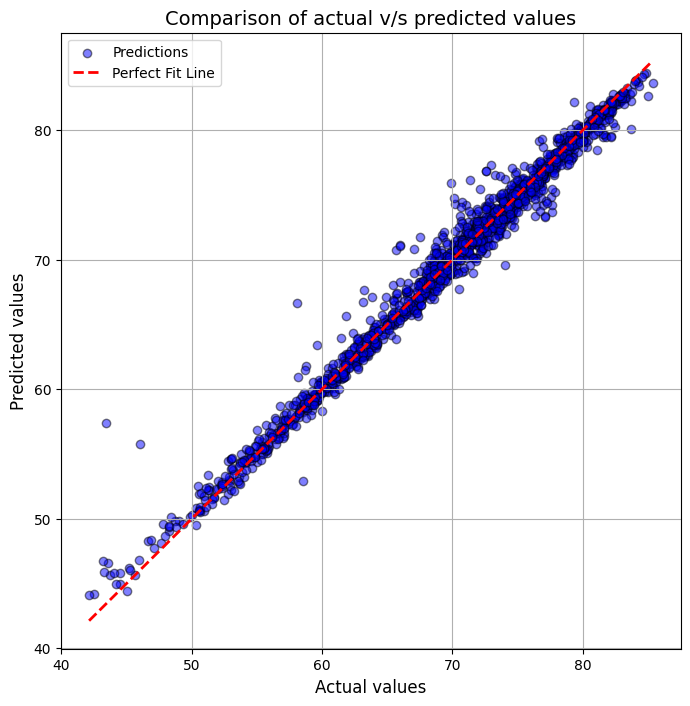

In [49]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', edgecolor='k', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit Line')
plt.xlabel('Actual values', fontsize=12)
plt.ylabel('Predicted values', fontsize=12)
plt.title('Comparison of actual v/s predicted values', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [50]:
df.head(20)

,country,country_code,year,health_exp,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality,prev_hiv,inci_tuberc,prev_undernourishment,country_encoded
0,Aruba,ABW,1999,5.466316,73.561000,74.0,19.900000,12.600000,23.329307,0.400000,8.0,7.370968,12
1,Africa Eastern and Southern,AFE,1999,5.656960,51.258874,697.0,88.285642,38.433841,142.506373,6.684793,51.0,33.163569,1
2,Afghanistan,AFG,1999,9.443391,54.846000,1346.0,94.600000,64.000000,135.800000,0.100000,190.0,46.000000,0
3,Africa Western and Central,AFW,1999,3.723750,49.726429,925.0,101.541373,44.733554,173.943151,0.400000,51.0,16.365604,2
4,Angola,AGO,1999,1.908599,45.386000,860.0,123.500000,51.000000,208.000000,1.300000,297.0,67.400000,7
5,Albania,ALB,1999,5.944198,75.183000,14.0,25.200000,12.200000,28.500000,0.100000,22.0,4.900000,3
6,Andorra,AND,1999,5.952764,71.910378,74.0,6.800000,3.700000,8.000000,0.400000,21.0,7.370968,6
7,Arab World,ARB,1999,3.927454,66.716758,240.0,45.119240,26.049299,61.691579,0.104300,51.0,11.047286,9
8,United Arab Emirates,ARE,1999,2.374135,73.670000,22.0,8.500000,6.000000,10.900000,0.100000,3.8,3.300000,251
9,Argentina,ARG,1999,8.220011,73.722000,72.0,17.900000,11.100000,20.100000,0.300000,37.0,2.900000,10
